# Is the crash reproducible? Testing different 32 column configurations.

As we have seen in notebook 1.1 the 32 column run trained with a full year of data (002) crashed almost immediately, while the 36 days version (001) did not (that one was just bad). So why is this happening.

To test I trained another full year network but with fewer epochs. Caveat, the validation score is still just as good as it was before. See issues #1 and #7 (https://github.com/raspstephan/CBRAIN-CAM/issues) for more thoughts on this.

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

## 003 - Fewer epochs, but essentially just another random start for the network training

So this run crashed after two days approximately. Longer than 002 but still a pretty quick crash.

The crash message is a little different:

```
nstep, te         143   3308073085.00998       -4.43624930726157
  4.427697813725494E-004   98476.5165382975
...
findsp not converging at point i, k            2          30
  t, q, p, enin    124.640936779542       8.913049824036012E-002
   102740.546741311        426460.943361949
  tsp, qsp, enout    313.370805700415       4.645249989351452E-002
   426510.315431204
```

Again, I had to adjust the output frequency, so that one file just stops before the crash.

In [2]:
%cd /scratch/05488/tg847872/nncam_003_32cols_engy_ess_1y_fewer_epochs

/scratch/05488/tg847872/nncam_003_32cols_engy_ess_1y_fewer_epochs


In [12]:
!ls

atm_in
cam
keras_matrices
nn_003.cam2.h1.0000-01-01-00000.nc
nn_003.cam2.h1.0000-01-03-82800.nc
nn_003.cam2.h2.0000-01-01-00000.nc
nn_003.cam2.h2.0000-01-03-82800.nc
out.txt
run.slurm
spinup_AndKua_aqua_SPCAM3.0.cam2.i.0000-12-02-00000.nc


In [17]:
h1 = xr.open_mfdataset('*h1.0000-01-01*', decode_times=False, concat_dim='time')

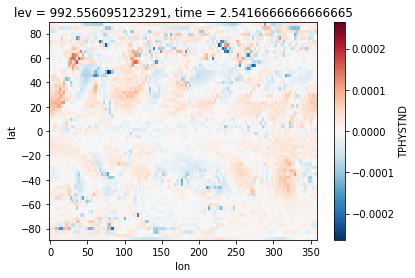

In [24]:
h1s.TPHYSTND.isel(time=122, lev=-1).plot();

In [20]:
h1.TPHYSTND.isel(time=-1, lev=29).max(dim='lat').argmax(dim='lon').load(), \
h1.TPHYSTND.isel(time=-1, lev=29).max(dim='lon').argmax(dim='lat').load()

(<xarray.DataArray 'TPHYSTND' ()>
 array(29)
 Coordinates:
     lev      float64 992.6
     time     float64 2.938, <xarray.DataArray 'TPHYSTND' ()>
 array(48)
 Coordinates:
     lev      float64 992.6
     time     float64 2.938)

In [21]:
crashlat = 48; crashlon = 29

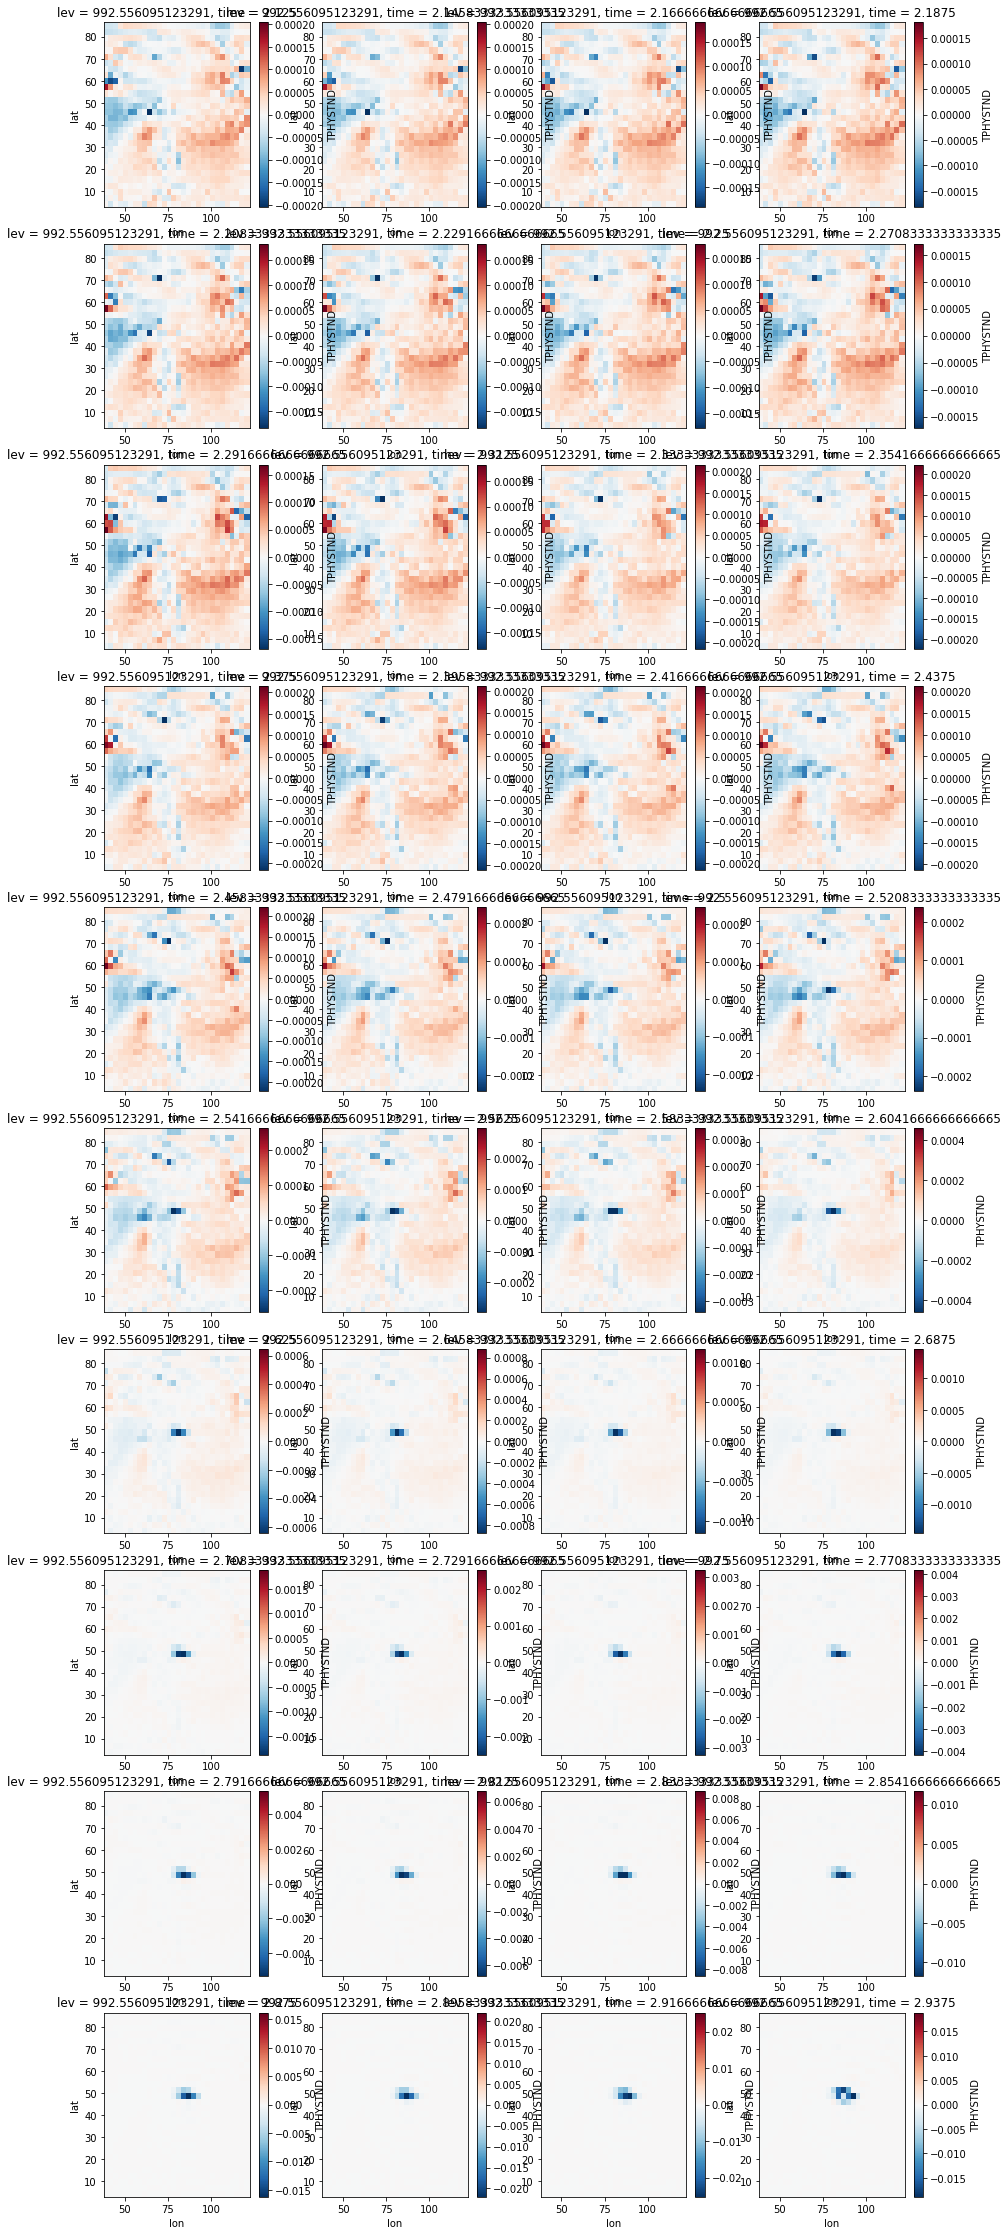

In [30]:
fig, ax = plt.subplots(10, 4, figsize=(15,40))
for i, t in enumerate(range(142-40, 142)):
    h1.TPHYSTND.isel(
        time=t, lev=-1, lat=slice(crashlat-15, crashlat+15), lon=slice(crashlon-15, crashlon+15)).plot(ax=ax.flat[i])

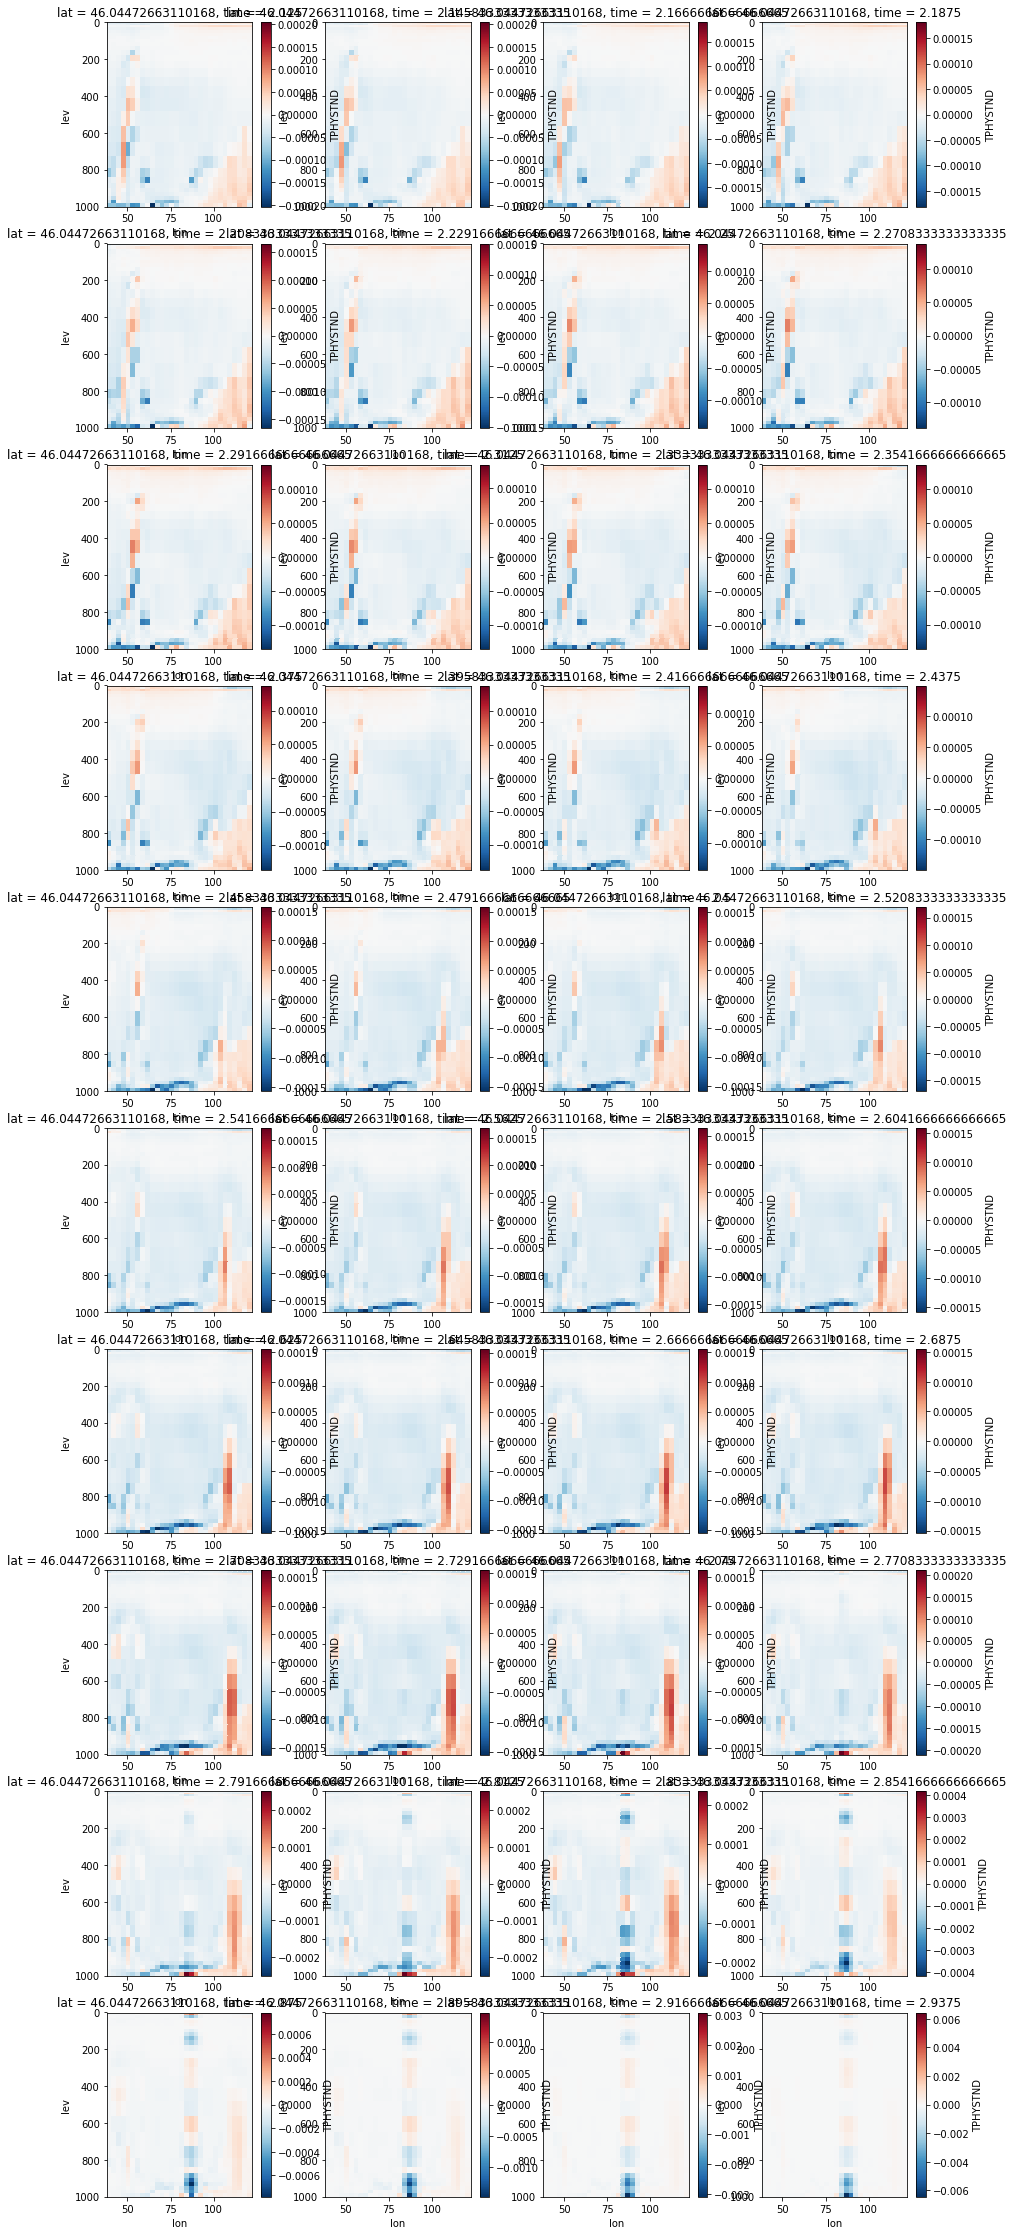

In [32]:
fig, ax = plt.subplots(10, 4, figsize=(15,40))
for i, t in enumerate(range(142-40, 142)):
    h1.TPHYSTND.isel(
        time=t, lat=crashlat, lon=slice(crashlon-15, crashlon+15)).plot(ax=ax.flat[i], yincrease=False)

So the crash seems to be pretty similar to the 002 one. I find the sort of separated surface layer in the vertical slices interesting.